In [48]:
import matplotlib.pyplot as plt
from one_dimensional_search import dichotomy, golden_ratio, fibonacci, line_search
import matplotlib.ticker as ticker
import numpy as np
import math

# №1

In [2]:
def build_one_dimen_plots(method, func, plot_name):
    left = -1000
    right = 200
    epsilons = [0.1 * deg for deg in range(1, 9)]
    iters = []
    for epsilon in epsilons:
        res, it, _, _ = method(func, left, right, epsilon)
        iters.append(it)
    
    eps = 0.3
    _, iter_num, a, b = method(func, left, right, eps)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    fig.suptitle(plot_name, fontsize=16)
    ax1.plot(epsilons, iters, '.-')
    ax1.set_title('Iterations to epsilon')

    iterations = [(i + 1) for i in range(iter_num)]
    ax2.plot(iterations, a, '.-')
    ax2.plot(iterations, b, '.-')
    ax2.set_title('Line to iteration')

In [3]:
function = lambda x: x ** 2

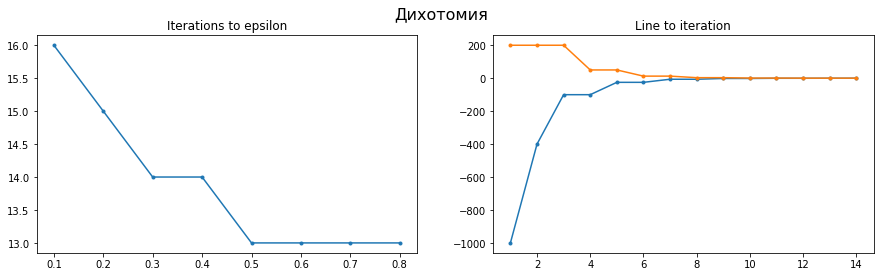

In [4]:
build_one_dimen_plots(dichotomy, function, "Дихотомия")

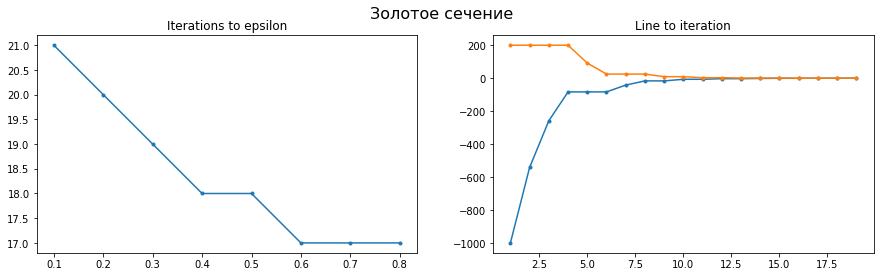

In [5]:
build_one_dimen_plots(golden_ratio, function, "Золотое сечение")

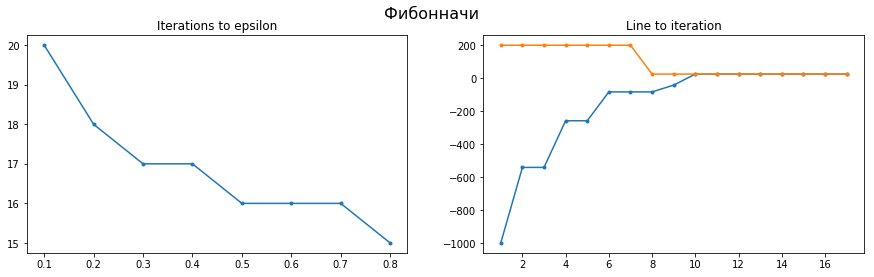

In [6]:
build_one_dimen_plots(fibonacci, function, "Фибонначи")

In [7]:
line_search(function, -180, 1e-3)

475.35

# №2

In [84]:
def build_gradient_plot(func, func_grad, x, conv_cond):
    one_dim_methods = [dichotomy, golden_ratio, fibonacci, linear_search]
    one_dim_methods_name = ["Дихотомия", "Золотое сечение", "Фибонначи", "Линейный поиск"]
    iters_num = []
    for method in one_dim_methods:
        res, _, _ = gradient_descent(func, func_grad, x, method, conv_cond, eps=1e-2)
        iters_num.append(res)
    
    const_res, _, _ = gradient_descent(func, func_grad, x, conv_cond, None, True)
    print(const_res)
    fig, ax = plt.subplots()
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
        
    y_pos = np.arange(len(one_dim_methods))
    ax.barh(y_pos, iters_num, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(one_dim_methods_name)
    ax.invert_yaxis()
    ax.set_xlabel('iterations')
    ax.set_title('Gradient convergence')

In [203]:
def linear_search(func, grad, x0):
    alpha = 1
    c = 0.5
    f0 = func(x0)
    df_f0 = np.dot(grad, grad)
    while func(x0 - alpha * grad) > f0 + c * alpha * df_f0:
        alpha = alpha / 2
    return alpha


def gradient_descent(func, func_grad, x, step_search_method, conv_condition, max_iter, const_step=False, step=1e-5, eps=1e-3):
    trace = [x]
    y = func(x)
    step_number = 0
    while True:
        step_number += 1
        grad = func_grad(x)
        if not const_step:
            if step_search_method is linear_search:
                step = linear_search(func, grad, x)
            else:
                step = get_step(func, x, grad, step_search_method)
        next_x = x - step * grad
        next_y = func(next_x)
        if step_number > max_iter:
            return step_number, y, trace
        if conv_condition == 'grad':
            if np.linalg.norm(grad) < eps:
                return step_number, y, trace
        else:
            if abs(next_y - y) < eps:
                return step_number, y, trace
        x = next_x
        trace.append(x)
        y = next_y


def get_step(function, x, grad, search_method):
    def optimization_problem(alpha):
        return function(x - alpha * grad)
    right_border = line_search(optimization_problem, 0.)
    res, _, _, _ = search_method(optimization_problem, 0., right_border)
    return res

In [180]:
function = lambda x: x ** 2
function_grad = lambda x: 2 * x

149786


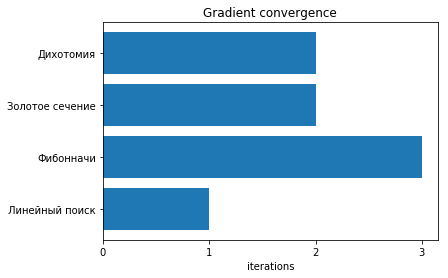

In [185]:
build_gradient_plot(function, function_grad, -100, 'arg')

# №3
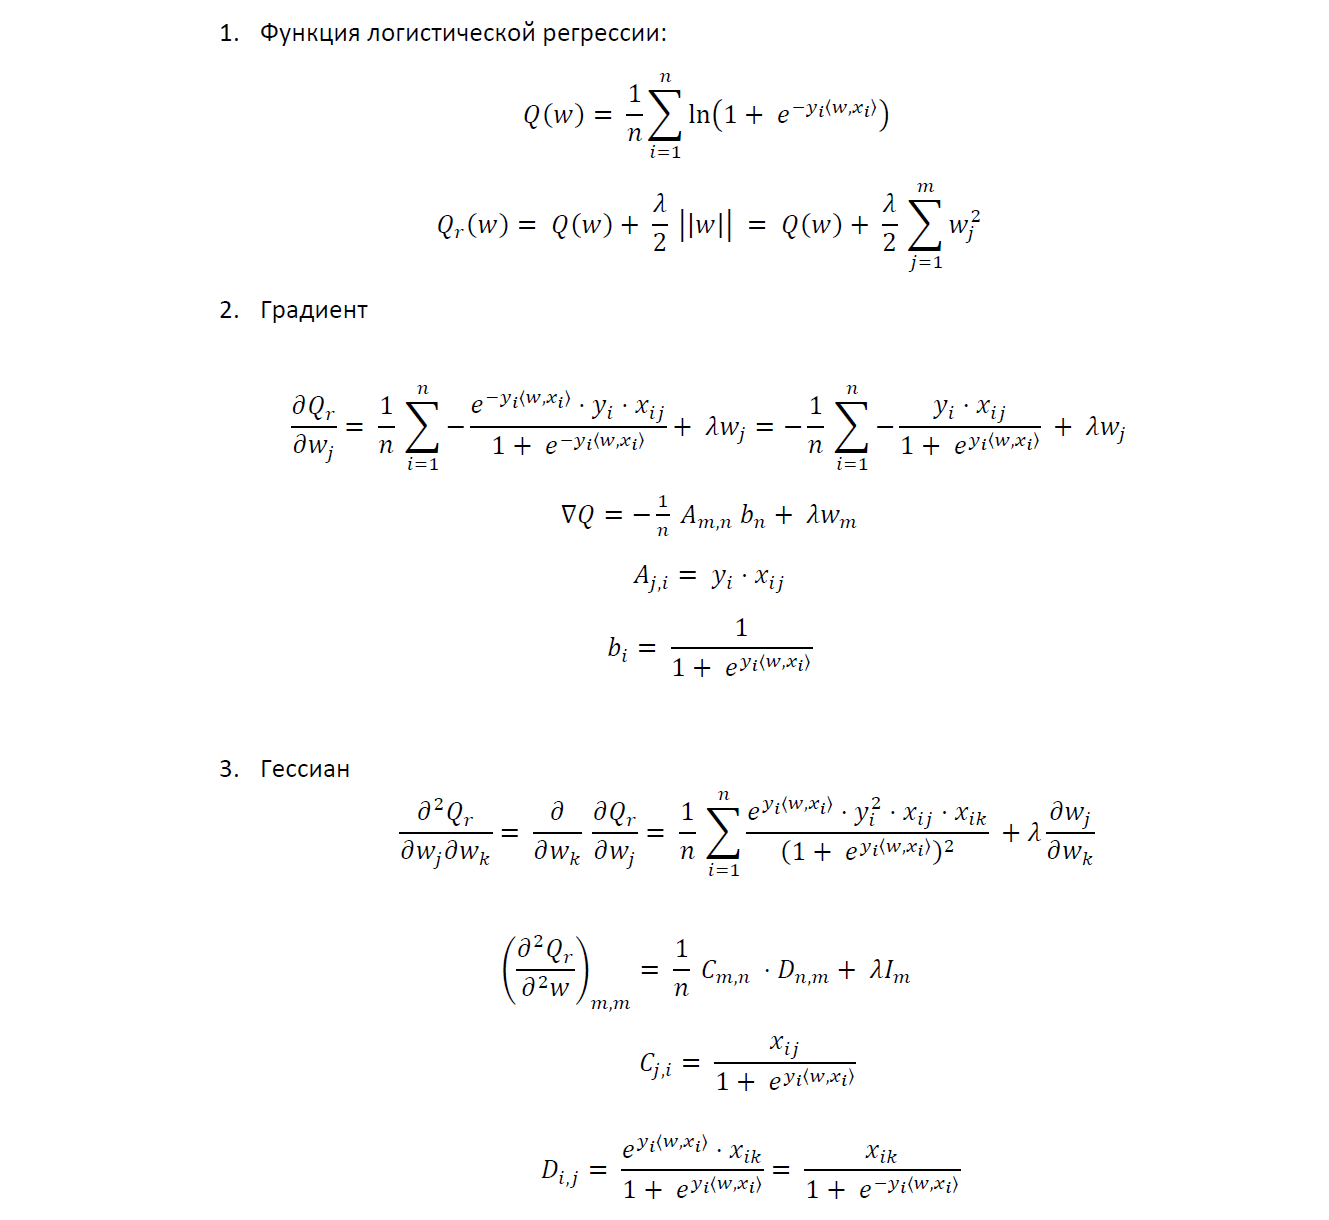

# №4

In [ ]:
class Logistic:
	def __init__(self, lmb, learning_rate, amount_steps=10000, eps=1e-5):
		self.lmb = lmb
		self.learning_rate = learning_rate
		self.amount_steps = amount_steps
		self.eps = eps
		self.w = None

	def __init_weight(self, m):
		self.w = np.random.normal(loc=0., scale=1., size=m)

	def __evaluate_Q(self, X, y, n):
		predictions = np.matmul(X, self.w)
		margins = predictions * y
		losses = np.logaddexp(0, -margins)
		return 1 / n * losses + self.lmb / 2 * np.sum(np.square(self.w))

	def __evaluate_gradient_Q(self, X, y, n):
		predictions = np.matmul(X, self.w)
		margins = predictions * y
		b = expit(-margins)
		A = np.transpose(X * y.reshape((n, 1)))
		return -1 / n * np.matmul(A, b) + self.lmb * self.w

	def __evaluate_hessian_Q(self, X, y, n):
		predictions = np.matmul(X, self.w)
		margins = predictions * y
		C = np.transpose(X * expit(-margins).reshape((n, 1)))
		D = X * expit(margins).reshape((n, 1))
		return 1 / n * np.matmul(C, D) + self.lmb * np.eye(m)

	def fit(self, X, y):
		n, m = X.shape
		self.__init_weight(m)
		Q = self.__evaluate_Q(X, y, n)
		for s in range(self.amount_steps):
			self.w = self.w - self.learning_rate * self.__evaluate_gradient_Q(X, y, n)

			new_Q = self.__evaluate_Q(X, y, n)
			if np.linalg.norm(new_Q - Q) < self.eps:
				break
			Q = new_Q

	def predict(self, X):
		return [np.sign(np.dot(x_i, self.w)) for x_i in X]

# №6

In [3]:
def rosenbrock_fun(x):
    return ((1. - x[0]) ** 2) + 100 * ((x[1] - x[0] ** 2) ** 2)

def rosenbrock_fun_grad(x):
    dx1 = 2 * (200 * (x[0] ** 3) - 200 * x[0] * x[1] + x[0] - 1)
    dx2 = 200 * (x[1] - (x[0] ** 2))
    return np.array([dx1, dx2])

In [221]:
def draw_function(func, func_grad, x, method):
    step_num, res, trace = gradient_descent(func, func_grad, x, method, 'grad', max_iter=30, eps=1e-8)
    print("steps -", step_num, "result -", res)
    if func is rosenbrock_fun and len(trace) > 500:
        trace = trace[0::10]
    X1 = np.arange(-50, 50, 0.1)
    X2 = np.arange(-50, 50, 0.1)
    Y = np.array([[func(np.array([x, y])) for x in X1] for y in X2])
    plt.figure(figsize=(16,8))
    plt.contour(X1, X2, Y, levels=100, cmap='summer')
    for i in range(len(trace) - 1):
        cur_point = trace[i]
        next_point = trace[i + 1]
        plt.scatter([cur_point[0]], [cur_point[1]])
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]])
    plt.grid()
    plt.show()

steps - 31 result - 19.1911168984375


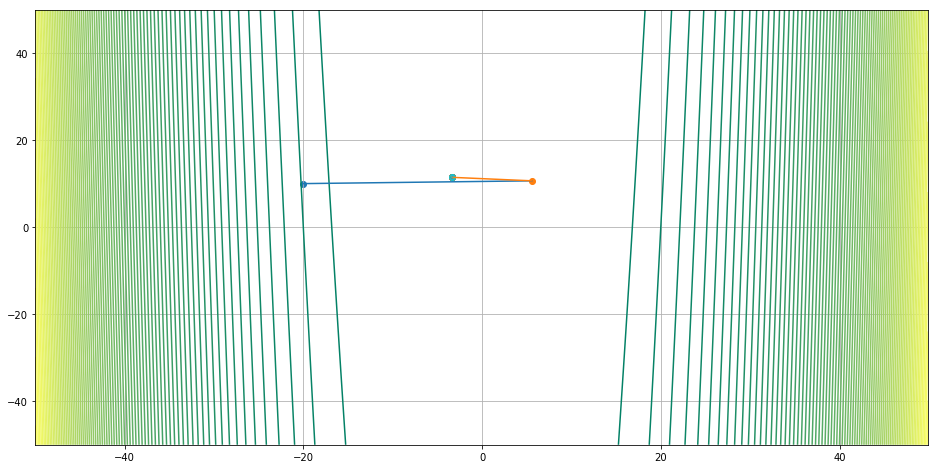

In [224]:
draw_function(rosenbrock_fun, rosenbrock_fun_grad, np.array([-20, 10]), golden_ratio)

In [200]:
def sum_squares_f(args):
    return np.sum(args ** 2)

def sum_squares_grad(args):
    return 2 * args

steps - 3 result - 1.2193697916404577e-20


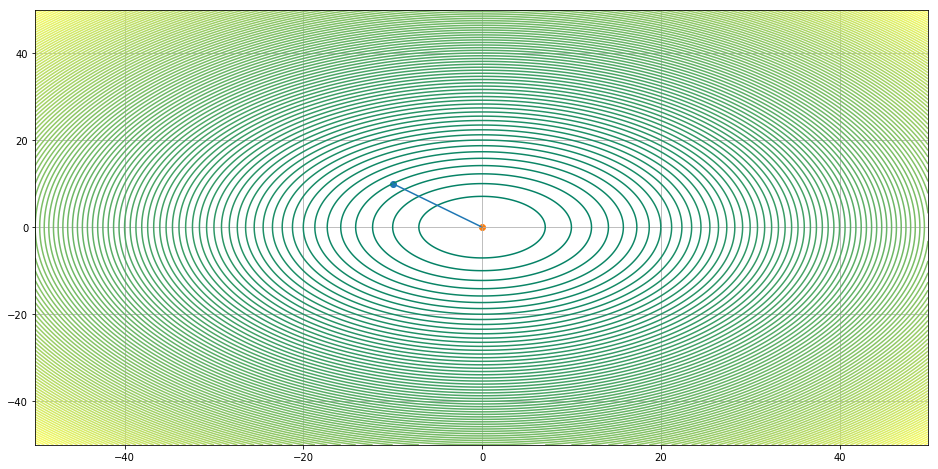

In [201]:
draw_function(sum_squares_f, sum_squares_grad, np.array([-10, 10]), golden_ratio)

In [165]:
def compare_step_strategy():
    const_steps, const_ans, _ = gradient_descent(sum_squares_f, sum_squares_grad, np.array([-100, 10]), None, 'grad', const_step=True, eps=1e-5)
    dichotomy_steps, dichotomy_ans, _ = gradient_descent(sum_squares_f, sum_squares_grad, np.array([-100, 10]), dichotomy, 'grad', eps=1e-5)
    print("const ans", const_ans, "dichotomy ans", dichotomy_ans)
    print("const steps -", const_steps, "dichotomy steps -", dichotomy_steps)

In [166]:
compare_step_strategy()

const ans 2.4999491710300814e-11 dichotomy ans 3.8847573400399525e-13
const steps - 840804 dichotomy steps - 3


In [169]:
def compare_init_values_strategy():
    far_steps, far_ans, _ = gradient_descent(sum_squares_f, sum_squares_grad, np.array([-10000, 5343]), dichotomy, 'grad', eps=1e-5)
    close_steps, close_ans, _ = gradient_descent(sum_squares_f, sum_squares_grad, np.array([-100, 30]), dichotomy, 'grad', eps=1e-5)
    print("far steps -", far_steps, "far ans -", far_ans)
    print("close step -", close_steps, "close ans -", close_ans)

In [170]:
compare_init_values_strategy()

far steps - 4 far ans - 5.024444371212747e-16
close step - 3 close ans - 4.192460891726521e-13


In [150]:
args = np.array([-100, 10])
args2 = np.array([-100, 10.1])
print('square -', abs(sum_squares_f(args) - sum_squares_f(args2)), 'rosenbrock -', abs(rosenbrock_fun(args) - rosenbrock_fun(args2)))

square - 2.0100000000002183 rosenbrock - 199799.0


# №7

In [171]:
def create_matrix(condition_number, n):
    r = math.sqrt(condition_number)
    A = np.random.randn(n, n)
    u, s, v = np.linalg.svd(A)
    h, l = np.max(s), np.min(s)  # highest and lowest eigenvalues (h / l = current cond number)

    # linear stretch: f(x) = a * x + b, f(h) = h, f(l) = h/r, cond number = h / (h/r) = r
    def f(x):
        return h * (1 - ((r - 1) / r) / (h - l) * (h - x))

    new_s = f(s)
    new_A = (u * new_s) @ v.T  # make inverse transformation (here cond number is sqrt(k))
    new_A = new_A @ new_A.T  # make matrix symmetric and positive semi-definite (cond number is just k)
    assert np.isclose(np.linalg.cond(new_A), condition_number)
    return new_A


def number_of_iters(cond, n_vars, n_checks=100):
    avg_iters = 0
    for _ in range(n_checks):
        A = create_matrix(cond, n_vars)
        b = np.random.randn(len(A))
        init_x = np.random.randn(len(A))
        func = lambda x: x.dot(A).dot(x) - b.dot(x)
        func_grad = lambda x: (A + A.T).dot(x) - b

        steps, _, _ = gradient_descent(func, func_grad, init_x, None, 'grad', const_step = True, step=1e-3, eps=1e-3)

        avg_iters += steps
    return avg_iters / n_checks

In [176]:
matrix = create_matrix(5.5, 5)

In [177]:
matrix.shape

(5, 5)

In [147]:
def build_dependency_plot():
    ns = list(range(2, 13, 2))
    condition_numbers = np.linspace(1, 20, 6)
    plt.figure()
    for n in ns:
        iter_numbers = [number_of_iters(cond, n) for cond in condition_numbers]
        plt.plot(condition_numbers, iter_numbers, label='n={}'.format(n))

    plt.xlabel('k')
    plt.ylabel('T(n, k)')
    plt.legend()
    plt.show()

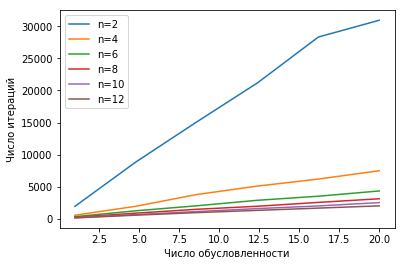

In [148]:
build_dependency_plot()